## Trabajo final ML

### Grupo:

- Carlos Mauricio Arteaga 
- Miguel Angel Pablos Perea

In [36]:
## Librerias
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from scipy import stats # libreria estadistica de Scipy
from sklearn.feature_selection import RFE # RFE es para seleccionar modelos
from sklearn.model_selection import train_test_split # para dividir la base en train y test
from sklearn import linear_model # para modelo lineal
from sklearn.metrics import mean_squared_error, r2_score # para sacar las metricas
import statsmodels.api as sm  ## Parte estadistica
from statsmodels.sandbox.regression.predstd import wls_prediction_std  ## Parte estadistica
import matplotlib.pyplot as plt

In [37]:
import os
print(os.getcwd())

d:\EAN_Curso_Machine_Learning_1\Machine_Learning_1_EAN\Codigo\Talleres


In [38]:
pd.set_option('display.max_columns', None)  # Muestra todas las columnas 

In [39]:
df_1 = pd.read_csv('../../Datos/churn-bigml-80.csv')
df_1


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


In [40]:
df_2 = pd.read_csv('../../Datos/churn-bigml-20.csv')
df_2

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


In [41]:
#Concatenamos los dos dataframes para ajustar a las preferencias propias en las divisiones de train y test
df = pd.concat([df_1, df_2], axis=0, ignore_index=True)  # Concatenamos los dos dataframes
df


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
3329,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
3330,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
3331,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


## Analisis exploratorio (EDA)

In [42]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

## Descripcion del conjunto de datos

El DataFrame presentado fue tomado de la siguiente direccion url: https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets

### Descripcion general de las columnas

- 'State' : estado de residencia del cliente, representado por su abreviatura de dos letras.
- 'Account length': Tiempo del cliente en la compañia en dias.
- 'Area code': Código de área.
- 'International plan': Indica si el cliente tiene contratado un plan de llamadas internacionales.
- 'Voice mail plan': Indica si el cliente tiene un plan de correo de voz.
- 'Number vmail messages'. Número de mensajes de correo de voz. 
- 'Total day minutes': Total de minutos en el  dia.
- 'Total day calls': Total de llamas en el dia.
- 'Total day charge': Valor cargado al cliente por los minutos utilizados en el dia.
- 'Total eve minutes': Tolal de minutos en la tarde. 
- 'Total eve calls' : total de llamadas hechas en la tarde.
- 'Total eve charge': Valor cargado al cliente por los minutos utilizados en la tarde.
- 'Total night minutes': Total de minutos en la noche.
- 'Total night calls': Total llamadas en la noche.
- 'Total night charge': Valor cargado al cliente por los minutos utilizados en la noche.
- 'Total intl minutes': Total minutos en llamadas internacionales.
- 'Total intl calls': Total de llamadas internacionales.
- 'Total intl charge': Valor cargado al cliente por llamdas internacionales.
- 'Customer service calls': Numero de llamadas hechas al servicion de soporte.  
- 'Churn': Indica si el cliente ha abandonado el servicio o continua en la compañia.

El contexto del conjunto de datos esta centrado en la retencion de clientes, las columnas describen el comportamiento de los clientes en los servicios de telefonia, de una base de datos dipuradas para la compañia Orange Telecom.

El dataset tiene una variable objetivo 'Churn' que describe cuando un usuario cancela o no la subscripcion, esta columna describe un estado ideal para desarrollar modelos de clasificacion como:
- Regresio logistica
- Arboles de decision
- Rabdom forest
- XGBoost
- KNN

Adicional se pueden generar modelos de regresion para las variables numericas relacionadas con el consumo y finalmente modelos de clusterizacion para agrupar segmentos de clientes para personalizar estrategias de marketing identificando posibles patrones de uso, grupos con riesgo de abandono del servicio u otras necesidaes especiales. 

## Descripcion del problema de negocio.

---



In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [44]:
# Estado general del dataset
df.shape
#El dataset tiene 3333 filas y 20 columnas

(3333, 20)

#### Analisis de valores nulos. 

In [45]:
missing_values = df.isnull().sum() # Suma los valores nulos
missing_values  

# Encontramos que no hay datos faltantes en la base de datos, lo cual es bueno ya que no se tiene que realizar un proceso de imputacion de datos faltantes y analisis de los mismos. 

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [46]:
#Creamos una copia del dataframe original para el proceso de transofrmación de datos

df_final = df.copy()
df_final

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
3329,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
3330,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
3331,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


In [47]:
# Descripción general de las variables
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
State,3333,51,WV,106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Account length,3333.0,NaN,NaN,NaN,101.064806,39.822106,1.0,74.0,101.0,127.0,243.0
Area code,3333.0,NaN,NaN,NaN,437.182418,42.37129,408.0,408.0,415.0,510.0,510.0
International plan,3333,2,No,3010,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Voice mail plan,3333,2,No,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number vmail messages,3333.0,NaN,NaN,NaN,8.09901,13.688365,0.0,0.0,0.0,20.0,51.0
Total day minutes,3333.0,NaN,NaN,NaN,179.775098,54.467389,0.0,143.7,179.4,216.4,350.8
Total day calls,3333.0,NaN,NaN,NaN,100.435644,20.069084,0.0,87.0,101.0,114.0,165.0
Total day charge,3333.0,NaN,NaN,NaN,30.562307,9.259435,0.0,24.43,30.5,36.79,59.64
Total eve minutes,3333.0,NaN,NaN,NaN,200.980348,50.713844,0.0,166.6,201.4,235.3,363.7


In [48]:
# Identificamos las variables categoricas y numericas
var_categoricas = df_final.select_dtypes(include=['object']).columns    
var_numericas = df_final.select_dtypes(exclude=['object']).columns

print('Variables categoricas: ', var_categoricas)
print('------------------------------------------------')
print('Variables numericas: ', var_numericas)

Variables categoricas:  Index(['State', 'International plan', 'Voice mail plan'], dtype='object')
------------------------------------------------
Variables numericas:  Index(['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls', 'Churn'],
      dtype='object')


## Distribucion de la variable objetivo

In [93]:
# Conteo de la variable objetivo
conteo_churn = df_final['Churn'].value_counts(normalize=True) * 100
print(conteo_churn)

Churn
False    85.508551
True     14.491449
Name: proportion, dtype: float64


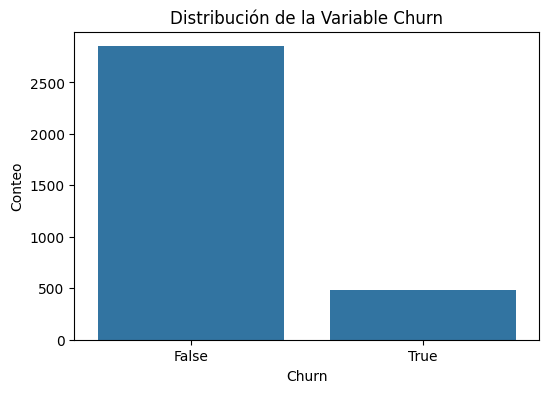

In [58]:
#Grafica de la variabe objetivo
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df_final)
plt.title('Distribución de la Variable Churn')
plt.xlabel('Churn')
plt.ylabel('Conteo')
plt.show()

### Distribucion variables numericas.

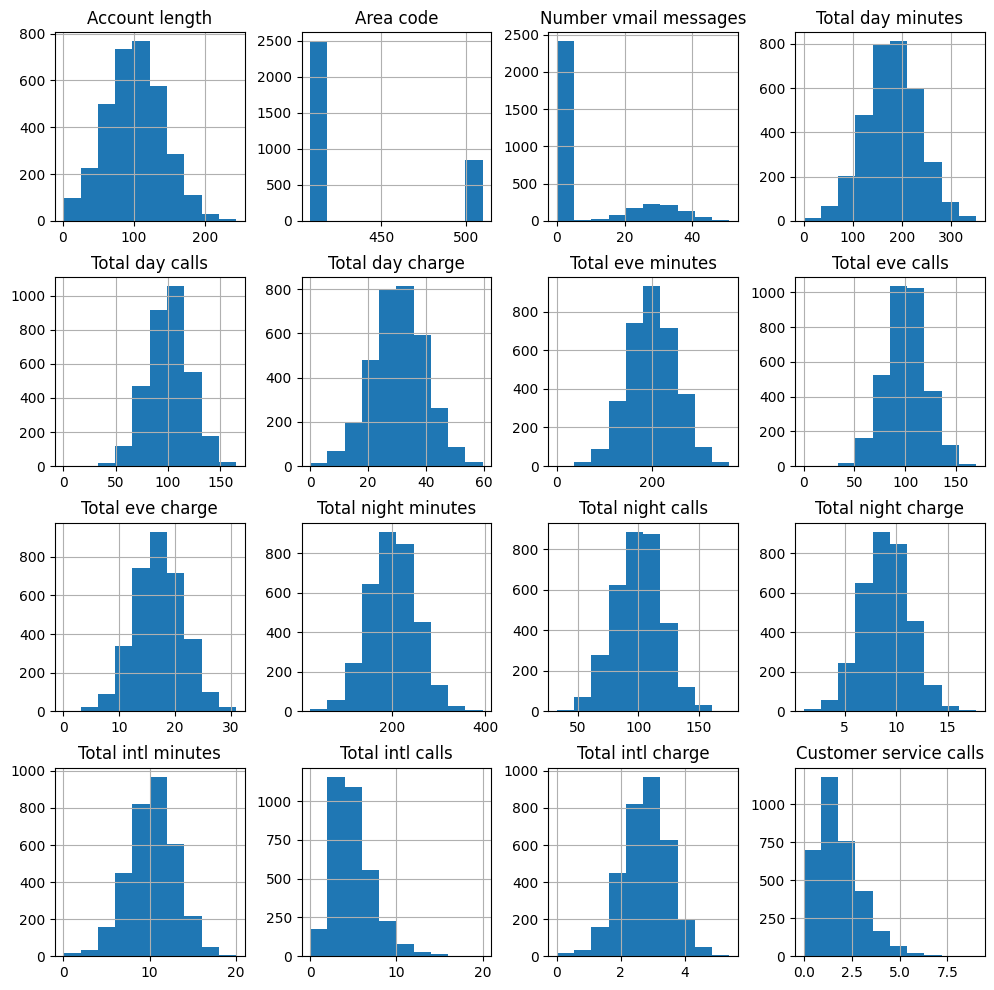

In [60]:
# Histograma de las variables numericas
df_final[var_numericas].hist(figsize=(12, 12))
plt.show()

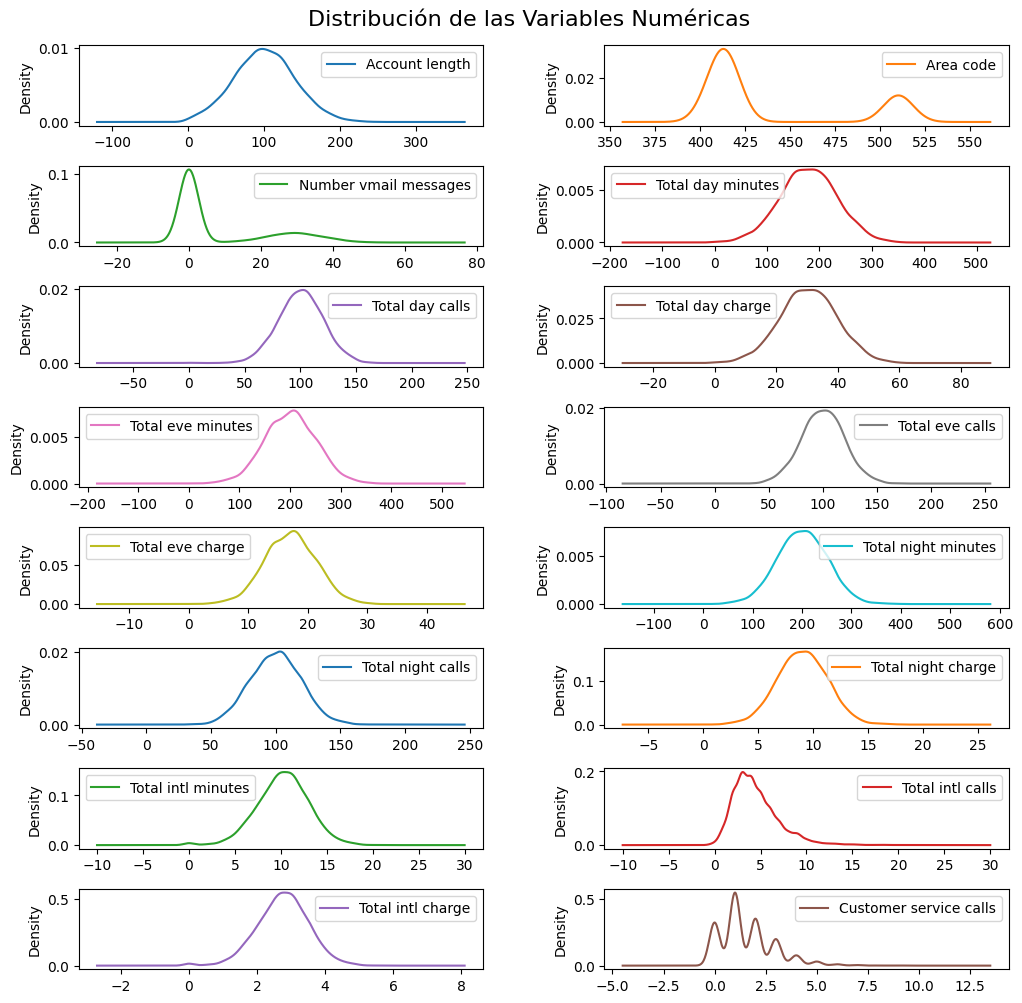

In [82]:
import math
import matplotlib.pyplot as plt

df_dist = df_final.select_dtypes(include=['int64', 'float64'])
n_cols = 2  # Número de columnas por fila
rows = math.ceil(df_dist.shape[1] / n_cols)

# Graficar con separación entre gráficos
df_dist.plot(kind='density', subplots=True, layout=(rows, n_cols), figsize=(12, 12), sharex=False)
plt.suptitle('Distribución de las Variables Numéricas', fontsize=16, y=0.91)
plt.subplots_adjust(hspace=0.5, wspace=0.3)  

plt.show()


### Distribucion variables categoricas

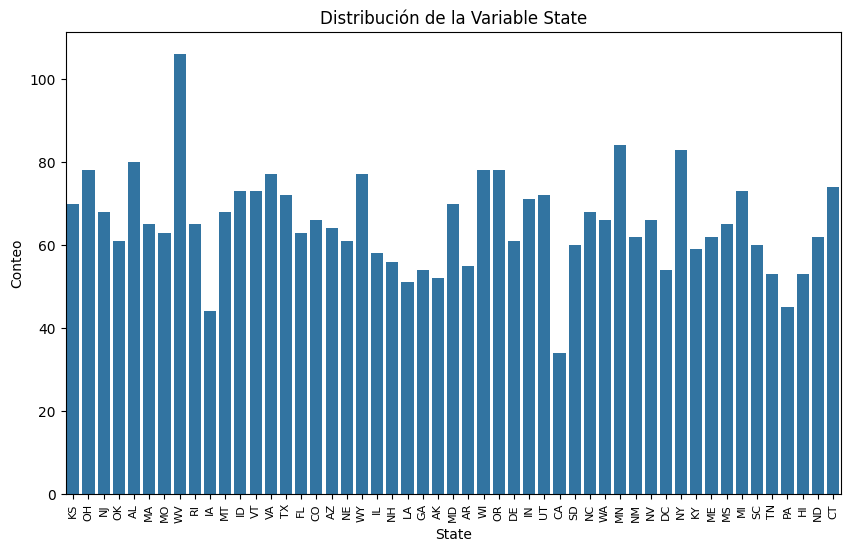

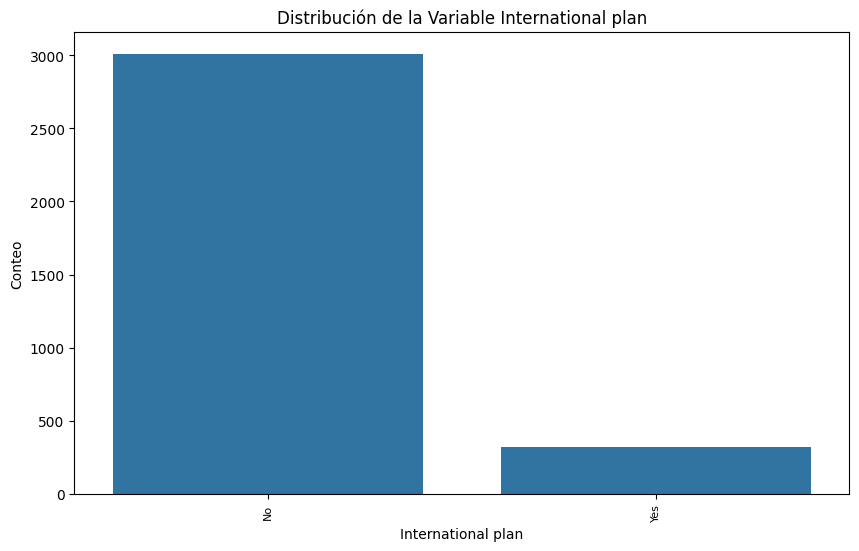

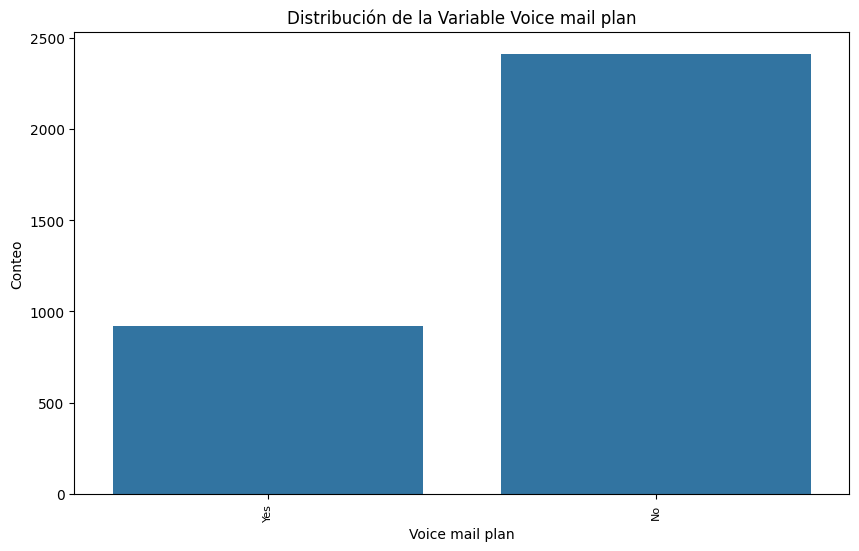

In [83]:
for col in var_categoricas:
    plt.figure(figsize=(10, 6))  
    sns.countplot(x=col, data=df_final)
    plt.title(f'Distribución de la Variable {col}')
    plt.xlabel(col)
    plt.ylabel('Conteo')
    plt.xticks(rotation=90, fontsize=8)  
    plt.show()


In [95]:
from sklearn.preprocessing import  OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [ ]:
#Variables categoricas y numericas
var_categoricas = df_final.select_dtypes(include=['object']).columns    
var_numericas = df_final.select_dtypes(exclude=['object']).columns
